## 4.3 Ising Model

The Ising model is a simple but powerful classical model for a real magnet. It is defined using a Hamiltonian (energy function):
$$H=-J\sum_{\langle ij\rangle}S_iS_j+\mu_BB\sum_iS_i,$$
where $S_i$ are the values the spins can take (for spin-$1/2$ these are $S_i=\pm 1$), and $\langle ij\rangle$ means sum over all $i$ but only consider $j$'s that are neighbours of $i$ (for 1D, $j=i\pm 1$ only). The parameter $J$ is the spin-exchange interaction constant. Notice that the Ising model includes the Pauli paramagnet term as the last contribution of the Hamiltonian. 

Consider the case when $B=0$, and $J>0$. If the values of $S_i$ and $S_j$ are the same, then the energy will decrease, and if they are opposite the energy will increase. Thus, the ground state of this Ising model will be a ferromagnet, with all spins pointing in the same direction. The problem is that there isn't a preferred direction to point in; the ground state will spontaneously choose one orientation in a process called spontaneous symmetry breaking. If $B\neq 0$, then the spins will favour the direction opposite to the direction of the magnetic field, as was the case in the Pauli paramagnet. In either case, at high temperatures we again expect that all the spins will randomize, with no preference. In two dimensions and higher, as the temperature is lowered, there is a specific temperature (the Curie point) at which there ferromagnetism suddenly appears, unlike in the Pauli paramagnetic case where the majority spin direction gradually builds. This is a real phase transition, much like the freezing point of water. No such phase transition occurs in one dimension, however.

If $B=0$ but $J<0$, then the ground state will favour the spins aligned in opposite directions. The ground state will then become an antiferromagnet. While there is no overall magnetism, there is still magnetic order. Notable example of such states are the undoped insulators that form the parent compounds of the high-temperature superconductors. In this case, the phase transition point is known as the Néel temperature. 

### 4.3.1 Simulating the Ising model: Monte Carlo with importance sampling = Metropolis Algorithm

One of the key factors that distinguishes the Ising model from the Pauli paramagnet is that one needs to keep track of each spin. Finding the ground state of the Ising model is an optimization problem: if one spin is flipped, then (if $J>0$) its neighbours also want to align with it, and so on across the lattice. Consider the Ising Hamiltonian for two spins; we have four possible energy states:
\begin{eqnarray}
&&\{S_1,S_2\}=\{1,1\}:\quad E_{1,1}=-J+2\mu B;\\
&&\{S_1,S_2\}=\{1,-1\}:\quad E_{1,-1}=J;\\
&&\{S_1,S_2\}=\{-1,1\}:\quad E_{-1,1}=J;\\
&&\{S_1,S_2\}=\{-1,-1\}:\quad E_{-1,-1}=-J-2\mu B.
\end{eqnarray}
If $B=0$, then there are two different states with the same energy: both spins pointing up, or both pointing down. For a very large system, the system has to 'choose' one over the other in a process called 'spontaneous symmetry breaking.' The ground state of the system can't readily oscillate between these two ground states, because to go from one to the other requires flipping all spins; if this were done sequentially then this would cost an energy of $2J$ which is huge. 

For non-zero magnetic field, the Pauli term breaks this degeneracy by giving each spin a (slightly) preferred orientation. Clearly if $B>0$ the last term has the lowest energy, but for a computer to reach this conclusion we would need to evaluate the energy for every possible combination. Clearly the complexity of this task scales like $2^N$ (assuming spin-$1/2$), an exponential scaling with the number of spins $N$.

It turns out that we can use the temperature to help us find the most likely ground state without having to enumerate every possible configuration. This is a very important example of using randomization to improve the classical complexity. Suppose that we have some random configuration of spins at iteration $k$: $\alpha_k=\{S_1,S_2,\ldots,S_i,\ldots,S_N\}$ (I've singled out spin $i$ for a reason I'll get to shortly). Recall from the canonical ensemble that the probability of a given configuration is given by
$$p(\alpha_k)=\frac{1}{Z}\exp\left(-\frac{E(\alpha_k)}{k_BT}\right),$$
where $E(\alpha_k)\equiv E_{S_1,S_2,\ldots,S_i,\ldots,S_N}$ is the energy and $Z$ is the partition function. Then if we randomly flip the $i$th spin from $S_i$ to $\overline{S}_i$ (the complement of $S_i$), the new configuration will be $\alpha_{k+1}=\{S_1,S_2,\ldots,\overline{S}_i,\ldots,S_N\}$, and the corresponding energy will be $E_{S_1,S_2,\ldots,\overline{S}_i,\ldots,S_N}\equiv E(\alpha_{k+1})$. The new probability will be
$$p(\alpha_{k+1})=\frac{1}{Z}\exp\left(-\frac{E(\alpha_{k+1})}{k_BT}\right).$$
If $E(\alpha_k)\leq E(\alpha_{k+1})$, then we accept this switch with relative probability 
$${\mathcal P}=\frac{p(\alpha_{k+1})}{p(\alpha_k)}=\exp\left(-\frac{\Delta E}{k_BT}\right)\leq 1,$$
where 
$$\Delta E=E(\alpha_{k+1})-E(\alpha_k).$$
Note that the partition function factor drops out. 

If the new configuration has a lower energy, then ${\mathcal P}>1$ and the new configuration is accepted with no doubt. But if $\Delta E>0$ we still accept it with some probability, because otherwise we might get trapped in a local minimum of the energy without having found the global minimum. To accept with some probability, we choose a random number $q$ between 0 and 1; if $q\leq{\mathcal P}$ we accept the new configuration, otherwise we reject it. The algorithm starts again with flipping another random spin. If the temperature is very large, then ${\mathcal P}\to 1$ and any spin configuration is as good as any other; this is consistent with the result that the spins are totally random. But as temperature decreases, energy differences from switches become more pronounced which should accelerate the algorithm toward the true ground state.

One important issue is how to decide when to stop the algorithm. Because spins are flipped with some probability even if the total energy increases, the system will never actually settle down. It is therefore important to probe the total energy as a function of the iteration index $k$. Then you will need to design a figure of merit that decides that the energy changes are sufficiently small over some range of $k$ that you aren't going to get anything better. Or, even better, you can keep a running save of the best (lowest energy) configuration and if you find that after many more $k$ you haven't improved on it, then this is your ground state. 

### 4.3.2 Assignment 8 Problems (60 points): Simulate the Ising model with Metropolis Monte Carlo sampling 

The point of this assignment is to find the spin configuration of the one-dimensional Ising model at finite temperature, using the Monte Carlo method with Metropolis sampling.

First we need to 'dimensionlessize' our Hamiltonian. Defining the energy in energy units of $J>0$, one obtains for the ferromagnet
$$\tilde{H}=-\sum_{\langle ij\rangle}S_iS_j+\frac{\mu_BB}{J}\sum_iS_i,$$
and defining the dimensionless magnetic field $\tilde{B}\equiv\mu_BB/J$ gives
$$\tilde{H}=-\sum_{\langle ij\rangle}S_iS_j+\tilde{B}\sum_iS_i,$$
and everything is now dimensionless. Actual temperature meanwhile is defined in units of $J/k_B$ so dimensionless temperature has these units factored out; for example, terms like $\exp(-H/k_BT)=\exp(-\tilde{H}J/k_BT)=\exp(-\tilde{H}/\tilde{T})$.

We'll encode our spins as a binary string, with $\uparrow$ encoded as 0 and $\downarrow$ encoded as 1. Given bit value at site $i$ as $b=\{0,1\}$, we can encode the spin value as $S=(-1)^b$. Then from one timestep to the next, the bitstring will change, much like a cellular automaton! In fact, this algorithm can be thought of as a CA.

Let's start with the code to find the true lowest energy of a one-dimensional system, as a function of the dimensionless magnetic field. Let's assume periodic boundary conditions. For small $\tilde{B}>0$, the energy is lowered if the spins are all $S=-1$ so that the Pauli paramagnet term is negative; meanwhile all Ising terms will contribute the same. So $\tilde{U}=-N-\tilde{B}N$ and the lowest-energy state will be all $b=1$ or $S=-1$. For small $\tilde{B}<0$, the energy is lowered if the spins are all $S=+1$ so that the Pauli term is again negative; meanwhile all Ising terms will again contribute the same. So again $\tilde{U}=-N-\tilde{B}N$ but the state will be all $b=0$ or $S=+1$. However, note that if there is one incorrect spin, the second lowest energy is
\begin{eqnarray}
\tilde{U}&=&-(N-2)+2-\tilde{B}(N-1)+\tilde{B}\nonumber \\
&=&-N+4-\tilde{B}(N-2),
\end{eqnarray}
whose energy is $4+2\tilde{B}$ higher than the ground state; the problem is that there are $N$ such configurations. Likewise, the number of possible states with the next higher energy will scale like $N^2$. Unless the temperature is very low, these will all have a reasonably high probability of being occupied, which makes finding the ground state more and more difficult. Furthermore, for $\tilde{B}=0$, it might be difficult to find the true lowest state on a computer as there is no magnetic field to bias the spins in one direction or the other.

**Question 1 (40 points) Find the lowest energy state of the Ising model numerically:**
Consider Ising spins on a ring (i.e. a line with periodic boundary conditions), for some $N$ around 30 to 50 (your choice). Choose a low dimensionless temperature of $\tilde{T}=1$. For dimensionless magnetic fields in the range $-2\leq\tilde{B}\leq 2$, use Metropolis sampling to find the ground state energy and compare with the theoretical value. Approximately how many (directed) random samples are required to find the true ground state? How do the results depend on the (dimensionless) magnetic field? What happens if you increase the (dimensionless) temperature? Note that for as few as 30 spins there are $2^{30}\approx 10^9$ different spin configurations, which would take waaaaay too long to check without some kind of optimizing random algorithm.

In [0]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt

"""
Given a list of 1s and -1s, flips a random bit and returns the flipped bit list
"""
def randFlip(Ns):
  i = len(Ns)
  listN = np.copy(Ns)
  #Pick a random bit to flip
  a = rand.randint(i)
  #Flip it
  listN[a] *= -1
  return listN

"""
Using the dimensionless Hamiltonian, evaluates the total mechcanical energy of
a list of 1 and -1 spins.
"""
def evalEnergy(Ns, B):
  Nlen = len(Ns)

  #Sum over the energies of its neighbours
  sumNeighbours = 0
  for i in range(Nlen):
    js = [(i + 1) % Nlen, (i - 1) % Nlen]
    for j in js:
      sumNeighbours += Ns[i] * Ns[j]
  sumNeighbours /= -2

  #Sum over its energy in the content of a magnetic field.
  Bres = 0
  for spin in Ns:
    Bres += B * spin
  
  return (sumNeighbours + Bres)

"""
Does metropolis sampling on some N of large size, to some number of desired iterations
"""
def metropolis(N, B, T, iters, debug = False):
  currentList = rand.choice([-1,1], N)

  priorList = np.copy(currentList)
  priorE = 2147483647 #Integer max, though Python can do much bigger. While we don't know what the lowest best is, we just assume it's some huge number and minimize from there.
  
  bestE = 2147483647 #Integer max, though Python can do much bigger. While we don't know what the lowest best is, we just assume it's some huge number and minimize from there.
  bestList = np.copy(currentList)

  #Metropolis sample for how many samples we need to do this for.
  for iteration in range(iters):
    currentList = randFlip(currentList)
    newE = evalEnergy(currentList, B)

    eDiff = newE - priorE
    #print(eDiff)

    #If the result is lower, keep it!
    if eDiff < 0:
      priorE = newE
      priorList = np.copy(currentList)
    #Else...
    else:
      prob = np.exp((-eDiff)/T)
      randVal = rand.random()
      #We might keep it anyways
      if randVal < prob:
        priorE = newE
        priorList = np.copy(currentList)
      #If we don't, then we need to start again at our prior value, since we reject this current value.
      else:
        #If current is not it, assign it back to the prior! Ow, I missed this and everything didn't make sense.
        currentList = np.copy(priorList)
      #Debugging stuff.
      if debug:
        print("----Probs----")
        print(prob)
        print(randVal)

    if debug:
      print(newE)
      print(priorE)
      print(eDiff)
      """
      print("----Energy difference----")
      print(newE)
      print(priorE)
      print(bestE)
      print(evalEnergy(priorList, B))
      print("----Constants----")
      print(T)
      print(B)
      print("----Results----")
      print(currentList)
      print(priorList)
      print(bestList)
      print()
      print(newE)
      print(priorE)
      print(bestE)
      """
    #Check to see if the result is the new lowest result we've seen yet.
    bestDiff = newE - bestE
    #print(bestDiff)
    #New historical low, keep it.
    if bestDiff < 0:
      bestE = newE
      bestList = np.copy(currentList)
    
  return bestE

In [0]:
"""
Gets the theoretical minimum energy
Absolute value of B because this N 
is the number of particles, and then
the particles can always align with
the magnetic field to reduce the min
energy as much as possible, so the sign
of the B field doesn't actually matter.
"""

def theoMin(N, B):
  return -N - abs(B)*N

In [0]:
"""
This function, given a number of iterations, magnetic field, and temperature, gives the number of errors 
(results different from the theoretical minimum) that our metropolis algorithm at some number of iterations 
found, over some number of tests. Epsilon is a float to make sure the difference works out right.
"""
def numErrors(N, B, T, iters, numTests, epsilon = 1e-4):
  errors = 0
  for test in range(numTests):
    theory = theoMin(N, B)
    res = metropolis(N, B, T, iters)
    if (res - theory) > epsilon:
      errors += 1
  return errors


In [0]:
numErrors(40, 0.0, 1, 1000, 50, epsilon = 1e-4)

48

In [0]:
theoMin(40, 0.0)

-40.0

In [0]:
metropolis(40, -0.0, 55, 500)

-16.0

In [0]:
#Flipping sanity check
randFlip([-1,1,1,1,-1,1,1])

array([ 1,  1,  1,  1, -1,  1,  1])

In [0]:
#Theoretical minimum sanity check. Should be -N - N = -2N for B = -1 or 1...
print(theoMin(40, -1))
print(theoMin(40, 1))

-80
-80


In [0]:
"""
Metropolis Sanity Check
"""
arr = rand.choice([-1,1],10)
#print(arr)
evalEnergy(arr, 0)

print(metropolis(40, -1, 1, 20000, debug = False))

-80.0


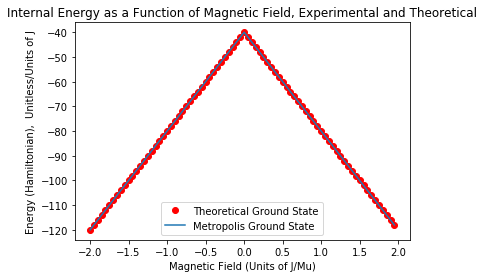

In [0]:
"""
Q1 Start - Comparison of Experimental (Metropolis) and Theoretical Ground State B Values
"""

# For 40 particle spins, 10000 iterations of metropolis, temperature = 1, and 2*grid different entries in B.
N = 40
numIter = 10000
T = 1
grid = 20
B = [x/grid for x in range(-2*grid, 2*grid)]

theo = []
exp = []
for b in B:
  theo.append(theoMin(N, b))
  exp.append(metropolis(N, b, T, numIter))

plt.figure()
plt.title("Internal Energy as a Function of Magnetic Field, Experimental and Theoretical")
plt.xlabel("Magnetic Field (Units of J/Mu)")
plt.ylabel("Energy (Hamiltonian),  Unitless/Units of J")
plt.plot(B, theo, "ro", label = "Theoretical Ground State")
plt.plot(B, exp, label = "Metropolis Ground State")
plt.legend()

#### As we can see from the graph above, the results of my metropolis algorithm is basically dead-on compared to the theoretical ground state, showing that our metropolis algorithm is extremely accurate. Sometimes, when the above is run again, there is one or two small deviations upward at one place, indicating that the metropolis algorithm isn't perfect, being a randomized algorithm, but it works well enough for most of what we have here.

#### How many iterations does it take to be reasonably sure the metropolis algorithm found the correct ground state? And how does that depend on Temperature and Magnetization? That's below:

------ Current t working on: 1 -------
Current b working on: -2.0
aItering: 1
aItering: 10
aItering: 100
aItering: 1000
aItering: 10000
Current b working on: -1.5
aItering: 1
aItering: 10
aItering: 100
aItering: 1000
aItering: 10000
Current b working on: -1.0
aItering: 1
aItering: 10
aItering: 100
aItering: 1000
aItering: 10000
Current b working on: -0.5
aItering: 1
aItering: 10
aItering: 100
aItering: 1000
aItering: 10000
Current b working on: 0.0
aItering: 1
aItering: 10
aItering: 100
aItering: 1000
aItering: 10000
Current b working on: 0.5
aItering: 1
aItering: 10
aItering: 100
aItering: 1000
aItering: 10000
Current b working on: 1.0
aItering: 1
aItering: 10
aItering: 100
aItering: 1000
aItering: 10000
Current b working on: 1.5
aItering: 1
aItering: 10
aItering: 100
aItering: 1000
aItering: 10000
------ Current t working on: 2 -------
Current b working on: -2.0
aItering: 1
aItering: 10
aItering: 100
aItering: 1000
aItering: 10000
Current b working on: -1.5
aItering: 1
aItering: 10
a

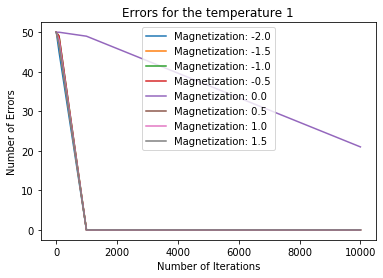

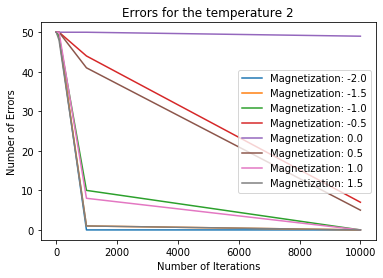

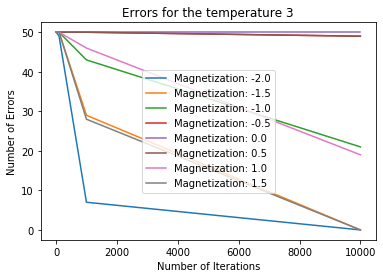

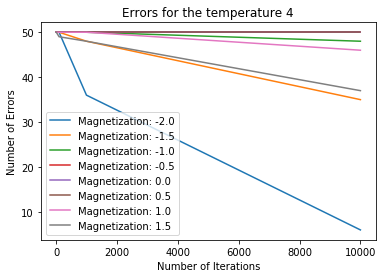

In [0]:
"""
Q1 - How many Directed Random Samples Are Needed to Find Ground State, Dependence on Magnetic Field, Impact of Higher Temperature
"""

N = 40
iters = [10**x for x in range(5)]
T = [t for t in range (1, 5)]
grid = 2
B = [x/grid for x in range(-2*grid, 2*grid)]

allErrors = []
for t in T:
  print("------ Current t working on: {} -------".format(t))
  plt.figure()
  plt.title("Errors for the temperature {}".format(t))
  plt.xlabel("Number of Iterations")
  plt.ylabel("Number of Errors")
  errorsB = []
  for b in B:
    print("Current b working on: {}".format(b))
    errorList = []
    for aIter in iters:
      print("aItering: {}".format(aIter))
      errorList.append(numErrors(N, b, t, aIter, 50))
    errorsB.append(errorList)


    plt.plot(iters, errorList, label = "Magnetization: {}".format(b))
  
  plt.legend()
  allErrors.append(errorsB)


## Approximately how many (directed) random samples are required to find the true ground state? How do the results depend on the (dimensionless) magnetic field? What happens if you increase the (dimensionless) temperature? 

#### If we consider an error rate of 10% to be acceptable, then it appears that for T = 1, we require about 1000 iterations of the metropolis algorithm to find the right answer 90% of the time, for any magnetic field except the 0 magnetic field. There, even 10000 iterations of metropolis isn't good enough to be correct more than 60% of the time!

#### As we can see in each graph, the result is that as the magnetic field increases, either both positively or negatively, the number of iterations required to find the smallest energy state decreases. Magnetization appears to help 'guide' the algorithm to a correct ground state.

#### As we can see between each graph, as temperature rises, the error rate rapidly rises. By the 4th temperature, only the strongest magnetic field gives us an acceptably low error rate (below 10%)!

#### All of this makes sense if we consider the metropolis algorithm itself a 'simulation' of the possible states the system can actually be in. As magnetic field increases, . Similarly, as temperature increases, the spins are much more free to rearrange themselves however they like, so the likelihood that the algorithm errors on some other state rather than getting the right lowest state increases. This also implies that as temperature goes up, the 'mean internal energy' should go up, as should the entropy. Does it?

**Question 2 (20 points) Obtain the mean energy and entropy of the Ising model as a function of temperature:**
Use the method developed above to obtain the mean energy and entropy of the one-dimensional Ising model as a function of temperature, for various choices of magnetic field (including zero). Plot the results, and comment on their behaviour; compare and contrast with the results for the Pauli paramagnet.

In [0]:
#Q2 Start

"""
This code by Prof. Feder
If it's indented incorrectly, everything breaks horribly! Damn indentation and whitespace errors!
Fixing that fixed everything
"""
def symbol_entropy(datalist):
  
# Estimate the Shannon entropy for a sequence of symbols.
    hist = {}
    for item in datalist:
        if item not in hist:
          hist[item] = 1
        else:
          hist[item] += 1
    
    counts = np.array( [hist[item] for item in hist])
    prob = counts / np.sum(counts)
    prob = prob[ prob != 0 ] #; print(prob)
    entropy = -np.sum( prob * np.log2(prob) )
  
    return entropy

In [0]:
"""
Number of particles, number of iterations of the algorithm, number of samples to sample the entropy and mean over
"""
N = 40
numIter = 500
samples = 20

# Magnetic field and temperature to vary over.
grid = 1
B = [x/grid for x in range(-2*grid, 2*grid)]
T = [t for t in range(1, 30)]

#Statistics per B
bEntropies = []
bMeans = []
for b in B:
  print("Current B: {}".format(b))
  #Statistics per T
  entropies = []
  means = []
  for t in T:
    print("Current T: {}".format(t))
    sample = []
    for i in range(samples):
      print("Current i: {}".format(i))
      res = metropolis(N, b, t, numIter)
      sample.append(res)
    print(sample)
    entropy = symbol_entropy(sample)
    mean = np.mean(sample)
    
    entropies.append(entropy)
    means.append(mean)
  
  bEntropies.append(entropies)
  bMeans.append(means)


Current B: -2.0
Current T: 1
Current i: 0
Current i: 1
Current i: 2
Current i: 3
Current i: 4
Current i: 5
Current i: 6
Current i: 7
Current i: 8
Current i: 9
Current i: 10
Current i: 11
Current i: 12
Current i: 13
Current i: 14
Current i: 15
Current i: 16
Current i: 17
Current i: 18
Current i: 19
[-120.0, -120.0, -120.0, -120.0, -120.0, -120.0, -120.0, -120.0, -120.0, -120.0, -120.0, -120.0, -120.0, -120.0, -120.0, -120.0, -120.0, -120.0, -120.0, -120.0]
Current T: 2
Current i: 0
Current i: 1
Current i: 2
Current i: 3
Current i: 4
Current i: 5
Current i: 6
Current i: 7
Current i: 8
Current i: 9
Current i: 10
Current i: 11
Current i: 12
Current i: 13
Current i: 14
Current i: 15
Current i: 16
Current i: 17
Current i: 18
Current i: 19
[-120.0, -120.0, -120.0, -120.0, -120.0, -120.0, -120.0, -120.0, -120.0, -120.0, -120.0, -120.0, -120.0, -120.0, -120.0, -120.0, -120.0, -120.0, -120.0, -120.0]
Current T: 3
Current i: 0
Current i: 1
Current i: 2
Current i: 3
Current i: 4
Current i: 5
Curre

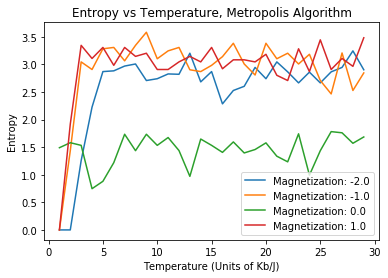

In [0]:
entsWithBs = zip(bEntropies, B)
meansWithBs = zip(bMeans, B)
plt.title("Entropy vs Temperature, Metropolis Algorithm")
plt.xlabel("Temperature (Units of Kb/J)")
plt.ylabel("Entropy")
for ents, b in entsWithBs:
  plt.plot(T, ents, label = "Magnetization: {}".format(b))
plt.legend()

Got here


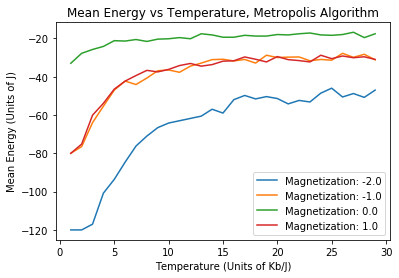

In [0]:
plt.figure()
plt.title("Mean Energy vs Temperature, Metropolis Algorithm")
plt.xlabel("Temperature (Units of Kb/J)")
plt.ylabel("Mean Energy (Units of J)")
print("Got here")
for means, b, in meansWithBs:
  plt.plot(T, means, label = "Magnetization: {}".format(b))
plt.legend()

#### From our graphs above, we can see the following:

#### Entropy: As temperature rises, we see that the entropy rises, up to a maximum, for any system where there was an external magnet magnetizing the system. They all appear to converge to an entropy of about 3.25 or so. However, if there is no magnetization, then the entropy remains stuck at about 1.5! Here, we have N = 40, but more importantly we only have 20 sample spins, else it gets way too slow. 2 ^ 3.25 corrisponds to about 10 unique entries, which means we're seeing roughly ten different values for the temperature twice, or a different set of probabilities that converges on the same entropy. 2^1.5 corrisponds to about 3 different entires with equal probability. What's going on?

#### I think the answer is the gradient in energies produced by a magnetic field versys no magnetic field. I don't know for sure, but if there is no magnetic field, then the system can only align or antialign across any of its particles, and so the number of different energies as a result is restricted. Contrast to if there's a magnetic field. There, it can align or antialign, and furthermore it could align or antialign with the external magnetic field, producing more possible different states, and so consequently a higher entropy.

#### Compared to the Pauli magnet, the Pauli magnet converges to some entropy for any given external magnetization, whilst here there needs to be some magnetization before it will converge. Furthermore, the Pauli magnet's entropy converged on a very specific entropy level correlated with the number of different spins available, whilst here we're analysing the information entropy of the number of different energy states available and so it isn't the Boltzmann Entropy.

#### Mean Energy: As temperature rises, we see that the mean temperature rises, up until a rough point where each absolute value of magnetization appears to converge. 2.0 appears to converge on -60, 1.0 on -40, and 0 on -20. What's going on?

#### Recall from the formula that magnetization should produce a lower energy level. Hence, the higher the magnetization, the lower the overall expected average energy, no matter the temperature. Why does it converge at those values, however? There are 40 particles, and it appears that in the case of B = 0, it rises from the theoretical minimum of -40 up to -20. So a bit less than half the spins are out of alignment, cancelling each other out.

#### What about the ones with a magnetic field, however? Note that the interaction with the magnetic field also contributes to the internal energy state - that is, if a state is disordered, it will have a different internal energy in interacting with that external state compared to a more ordered set. It appears that each increment of 1.0 in magnetic field strength drops the closest it can get to 0 by 20. That is, it seems the external magnetic field has a strong effect on the most the average mean energy can be, unlike a Pauli parammagnet.

#### In fact, compared to the Pauli magnet, both appear to converge to some level of internal energy as temperature rises, but as the Pauli paramagnet converges on zero, this one does not - instead remaining at some definitive level below 0, depending on how strong the external magnetic field is. If magnetization is correlated with internal energy, this indicates that this magnet should continue to hold some magnetization even at high temperatures!